In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 7

In [3]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

58889256/58889256 [==============================] - 15s 0us/step


In [4]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Create a new model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './../Datasets/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

Found 451 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    './../Datasets/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 210 images belonging to 7 classes.


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/50
14/14 [==============================] - 51s 4s/step - loss: 5.2296 - accuracy: 0.2411 - val_loss: 1.7453 - val_accuracy: 0.4323
Epoch 2/50
14/14 [==============================] - 50s 4s/step - loss: 1.6847 - accuracy: 0.4033 - val_loss: 1.3055 - val_accuracy: 0.5781
Epoch 3/50
14/14 [==============================] - 49s 4s/step - loss: 1.5504 - accuracy: 0.4224 - val_loss: 1.2404 - val_accuracy: 0.5938
Epoch 4/50
14/14 [==============================] - 49s 4s/step - loss: 1.4122 - accuracy: 0.4463 - val_loss: 1.1372 - val_accuracy: 0.6302
Epoch 5/50
14/14 [==============================] - 50s 4s/step - loss: 1.4090 - accuracy: 0.4558 - val_loss: 1.0353 - val_accuracy: 0.6771
Epoch 6/50
14/14 [==============================] - 51s 4s/step - loss: 1.2897 - accuracy: 0.4845 - val_loss: 1.0171 - val_accuracy: 0.7240
Epoch 7/50
14/14 [==============================] - 50s 4s/step - loss: 1.2752 - accuracy: 0.5227 - val_loss: 0.8861 - val_accuracy: 0.7396
Epoch 8/50
14/14 [==

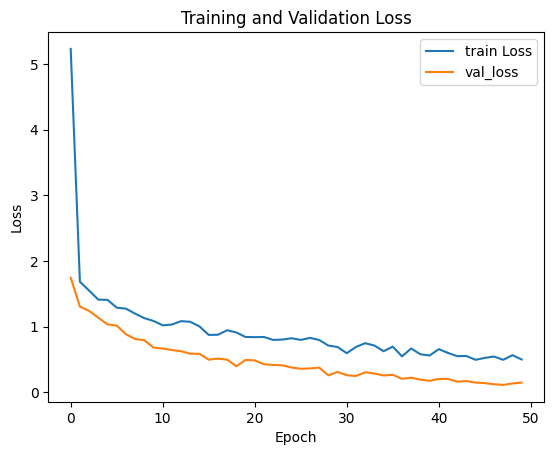

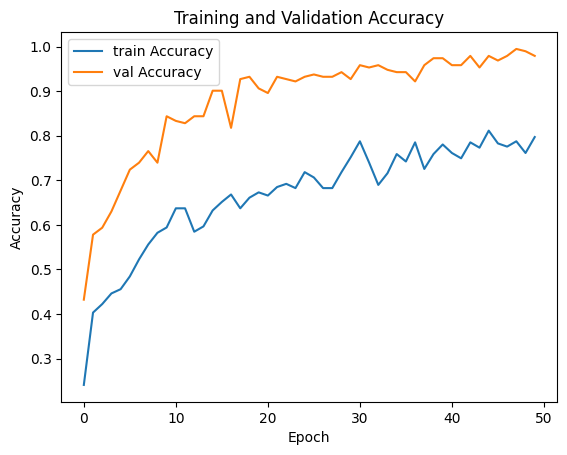

In [11]:
## plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model3.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model3.png')
plt.show()

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Replace 'path/to/your/image.jpg' with the path to the image you want to predict
image_path = './../Datasets/test/Black Scurf/2.jpg'
processed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(processed_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print(f'The predicted class is: {predicted_class}')

1/1 [==============================] - 0s 121ms/step
The predicted class is: 0
